<a href="https://colab.research.google.com/github/Krishantsingh/EDA-2/blob/main/EDA_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [8]:
df = pd.read_csv("Car Sale.csv")

In [9]:
df

,Car_id,Date,Customer Name,Gender,Annual Income,Dealer_Name,Company,Model,Engine,Transmission,Color,Price ($),Dealer_No,Body Style,Phone,Dealer_Region
0,C_CND_000001,1/2/2022,Geraldine,Male,13500,Buddy Storbeck's Diesel Service Inc,Ford,Expedition,DoubleÂ Overhead Camshaft,Auto,Black,26000.0,06457-3834,SUV,8264678.0,Middletown
1,C_CND_000002,1/2/2022,Gia,Male,1480000,C & M Motors Inc,Dodge,Durango,DoubleÂ Overhead Camshaft,Auto,Black,19000.0,60504-7114,SUV,6848189.0,Aurora
2,C_CND_000003,1/2/2022,Gianna,Male,1035000,Capitol KIA,Cadillac,Eldorado,Overhead Camshaft,Manual,Red,31500.0,38701-8047,Passenger,7298798.0,Greenville
3,C_CND_000004,1/2/2022,Giselle,Male,13500,Chrysler of Tri-Cities,Toyota,Celica,Overhead Camshaft,Manual,Pale White,14000.0,99301-3882,SUV,6257557.0,Pasco
4,C_CND_000005,1/2/2022,Grace,Male,1465000,Chrysler Plymouth,Acura,TL,DoubleÂ Overhead Camshaft,Auto,Red,24500.0,53546-9427,Hatchback,7081483.0,Janesville
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13084,C_CND_013085,4/22/2023,Alice,Female,13500,Saab-Belle Dodge,Honda,Accord,DoubleÂ Overhead Camshaft,Auto,Pale White,19000.0,60504-7114,Sedan,6135153.0,Aurora
13085,C_CND_013086,4/22/2023,Austin,Male,950000,Gartner Buick Hyundai Saab,Toyota,Tacoma,Overhead Camshaft,Manual,Black,36000.0,38701-8047,Hardtop,8955742.0,Greenville
13086,C_CND_013087,4/22/2023,Madina,Male,13500,Scrivener Performance Engineering,Buick,Park Avenue,Overhead Camshaft,Manual,Black,29001.0,38701-8047,Hatchback,7614329.0,Scottsdale
13087,C_CND_013088,4/22/2023,Lauriane,Male,485000,Star Enterprises Inc,Mercedes-B,SLK,Overhead Camshaft,Manual,Pale White,57001.0,99301-3882,Passenger,7997876.0,Austin


In [10]:
df.columns

Index(['Car_id', 'Date', 'Customer Name', 'Gender', 'Annual Income',
       'Dealer_Name', 'Company', 'Model', 'Engine', 'Transmission', 'Color',
       'Price ($)', 'Dealer_No ', 'Body Style', 'Phone', 'Dealer_Region'],
      dtype='object')

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13089 entries, 0 to 13088
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_id         13089 non-null  object 
 1   Date           13089 non-null  object 
 2   Customer Name  13088 non-null  object 
 3   Gender         13089 non-null  object 
 4   Annual Income  13089 non-null  int64  
 5   Dealer_Name    13089 non-null  object 
 6   Company        13088 non-null  object 
 7   Model          13088 non-null  object 
 8   Engine         13088 non-null  object 
 9   Transmission   13088 non-null  object 
 10  Color          13088 non-null  object 
 11  Price ($)      13088 non-null  float64
 12  Dealer_No      13088 non-null  object 
 13  Body Style     13088 non-null  object 
 14  Phone          13088 non-null  float64
 15  Dealer_Region  13088 non-null  object 
dtypes: float64(2), int64(1), object(13)
memory usage: 1.6+ MB


1. What is the average selling price of cars for each dealer, and how does it compare across different dealers ??

In [18]:
average_prices = df.groupby("Dealer_Name")["Price ($)"].mean().reset_index()
average_prices.columns = ["Dealer_Name", "Average Selling Price"]
print(average_prices)
highest_priced_dealer = average_prices.loc[average_prices["Average Selling Price"].idxmax()]
lowest_priced_dealer = average_prices.loc[average_prices["Average Selling Price"].idxmin()]

print(f"The dealer with the highest average price is {highest_priced_dealer['Dealer_Name']} with an average price of {highest_priced_dealer['Average Selling Price']}.")
print(f"The dealer with the lowest average price is {lowest_priced_dealer['Dealer_Name']} with an average price of {lowest_priced_dealer['Average Selling Price']}.")

                                        Dealer_Name  Average Selling Price
0               Buddy Storbeck's Diesel Service Inc           27669.456091
1                                  C & M Motors Inc           28393.724138
2                                       Capitol KIA           27719.830946
3                                 Chrysler Plymouth           27909.411765
4                            Chrysler of Tri-Cities           28820.379822
5                                     Classic Chevy           27940.105413
6                           Clay Johnson Auto Sales           27596.997041
7                                Diehl Motor CO Inc           27775.500000
8                             Enterprise Rent A Car           27882.040462
9                        Gartner Buick Hyundai Saab           27834.448980
10                              Hatfield Volkswagen           28281.156627
11                                  Iceberg Rentals           27813.276786
12                     Mc

2. Which car brand (Company) has the highest variation in prices, and what does this tell us about the pricing
trends ??

In [22]:
price_variation = df.groupby("Company")["Price ($)"].std().reset_index()
price_variation.columns = ["Company", "Price Variation (Std Dev)"]
most_variable_brand = price_variation.loc[price_variation["Price Variation (Std Dev)"].idxmax()]
print(price_variation)
print(f"The brand with the highest price variation is {most_variable_brand['Company']} with a standard deviation of {most_variable_brand['Price Variation (Std Dev)']:.2f}.")

       Company  Price Variation (Std Dev)
0        Acura                8121.293738
1         Audi               13461.232258
2          BMW               14719.477655
3        Buick               17629.673904
4     Cadillac               19193.624592
5    Chevrolet               13664.776875
6     Chrysler               11608.925979
7        Dodge               11269.806312
8         Ford               15871.880806
9        Honda               11310.255093
10     Hyundai                3573.264781
11    Infiniti               13372.857483
12      Jaguar               10299.473202
13        Jeep                9850.871348
14       Lexus               17955.911087
15     Lincoln               19378.136525
16  Mercedes-B               15631.145858
17     Mercury               16410.542201
18  Mitsubishi               11729.552799
19      Nissan               16453.508190
20  Oldsmobile               16005.301512
21    Plymouth               18916.287837
22     Pontiac               14301

3. What is the distribution of car prices for each transmission type, and how do the interquartile ranges
compare ??

In [23]:
df.columns

Index(['Car_id', 'Date', 'Customer Name', 'Gender', 'Annual Income',
       'Dealer_Name', 'Company', 'Model', 'Engine', 'Transmission', 'Color',
       'Price ($)', 'Dealer_No ', 'Body Style', 'Phone', 'Dealer_Region'],
      dtype='object')

                  25%      50%      75%      IQR
Transmission                                    
Auto          19000.0  24000.0  35000.0  16000.0
Manual        17000.0  22001.0  34000.0  17000.0


<Figure size 800x600 with 0 Axes>

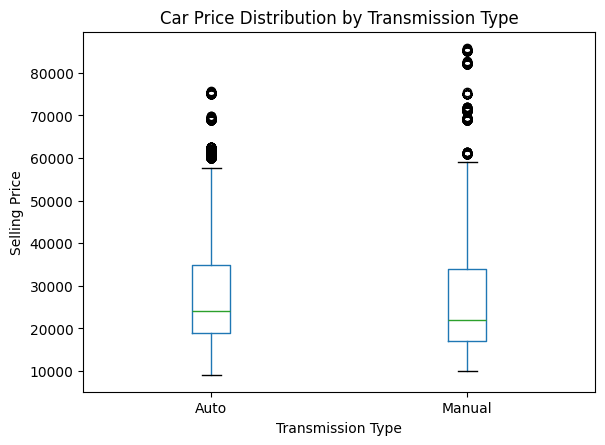

In [25]:
summary = df.groupby("Transmission")["Price ($)"].describe()
summary["IQR"] = summary["75%"] - summary["25%"]
print(summary[["25%", "50%", "75%", "IQR"]])

plt.figure(figsize=(8, 6))
df.boxplot(column="Price ($)", by="Transmission", grid=False)
plt.title("Car Price Distribution by Transmission Type")
plt.suptitle("")  # Remove default subtitle
plt.xlabel("Transmission Type")
plt.ylabel("Selling Price")
plt.show()

4.  What is the distribution of car prices across different regions ??

                       mean           std      25%      50%       75%  \
Dealer_Region                                                           
Aurora         28164.561313  15043.979346  18001.0  22501.0  34500.00   
Austin         28323.760054  14811.003879  18275.0  23000.0  35000.75   
Greenville     28048.761821  15016.679732  18000.0  22500.0  34000.00   
Janesville     27855.076010  14345.460842  18001.0  23000.0  34000.00   
Middletown     28136.979792  15082.490692  18000.0  22700.0  34000.00   
Pasco          28255.606722  14721.892914  18500.0  24000.0  34001.00   
Scottsdale     27753.626138  14697.429503  18000.0  23000.0  33000.00   

                    IQR  
Dealer_Region            
Aurora         16499.00  
Austin         16725.75  
Greenville     16000.00  
Janesville     15999.00  
Middletown     16000.00  
Pasco          15501.00  
Scottsdale     15000.00  


<Figure size 800x600 with 0 Axes>

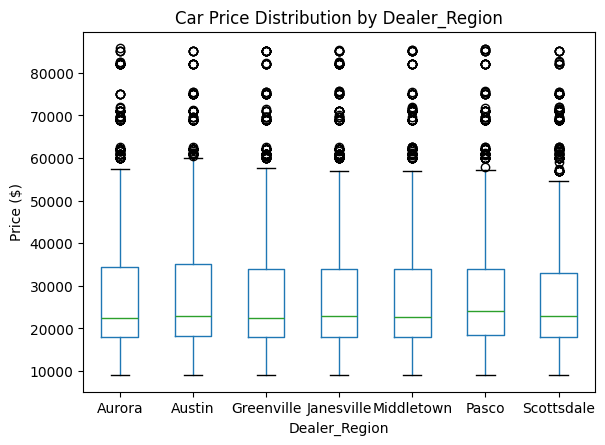

In [27]:
summary = df.groupby("Dealer_Region")["Price ($)"].describe()
summary["IQR"] = summary["75%"] - summary["25%"]
print(summary[["mean", "std", "25%", "50%", "75%", "IQR"]])
plt.figure(figsize=(8, 6))
df.boxplot(column="Price ($)", by="Dealer_Region", grid=False)
plt.title("Car Price Distribution by Dealer_Region")
plt.suptitle("")
plt.xlabel("Dealer_Region")
plt.ylabel("Price ($)")
plt.show()

5.  What is the distribution of cars based on body styles ??

In [28]:
df.columns

Index(['Car_id', 'Date', 'Customer Name', 'Gender', 'Annual Income',
       'Dealer_Name', 'Company', 'Model', 'Engine', 'Transmission', 'Color',
       'Price ($)', 'Dealer_No ', 'Body Style', 'Phone', 'Dealer_Region'],
      dtype='object')

  Body Style  Count  Percentage
0  Hatchback   3678   28.102078
1        SUV   3299   25.206296
2      Sedan   2461   18.803484
3  Passenger   2153   16.450183
4    Hardtop   1497   11.437958


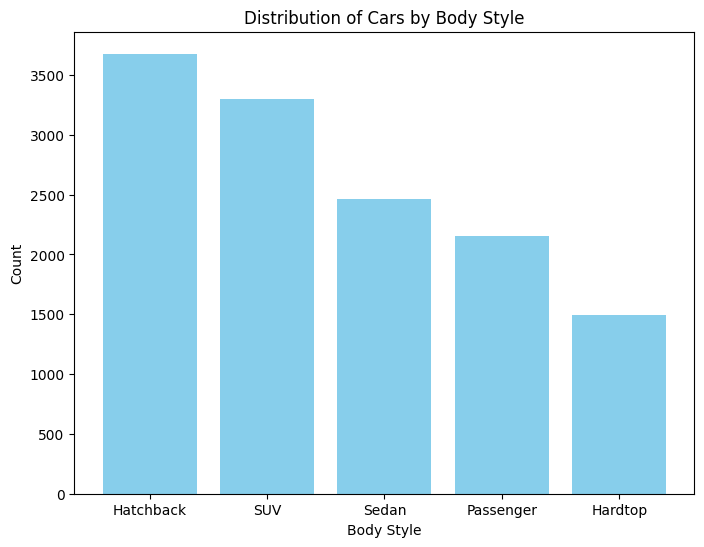

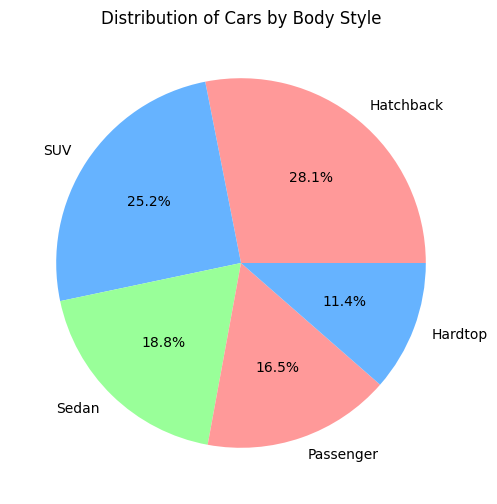

In [29]:
body_style_distribution = df["Body Style"].value_counts().reset_index()
body_style_distribution.columns = ["Body Style", "Count"]

total_cars = body_style_distribution["Count"].sum()
body_style_distribution["Percentage"] = (body_style_distribution["Count"] / total_cars) * 100
print(body_style_distribution)

plt.figure(figsize=(8, 6))
plt.bar(body_style_distribution["Body Style"], body_style_distribution["Count"], color="skyblue")
plt.title("Distribution of Cars by Body Style")
plt.xlabel("Body Style")
plt.ylabel("Count")
plt.show()

plt.figure(figsize=(8, 6))
plt.pie(
    body_style_distribution["Count"],
    labels=body_style_distribution["Body Style"],
    autopct="%1.1f%%",
    colors=["#ff9999", "#66b3ff", "#99ff99"]
)
plt.title("Distribution of Cars by Body Style")
plt.show()


6.  How does the average selling price of cars vary by customer gender and annual income ???

In [30]:
df.columns

Index(['Car_id', 'Date', 'Customer Name', 'Gender', 'Annual Income',
       'Dealer_Name', 'Company', 'Model', 'Engine', 'Transmission', 'Color',
       'Price ($)', 'Dealer_No ', 'Body Style', 'Phone', 'Dealer_Region'],
      dtype='object')

      Gender  Annual Income    Price ($)
0     Female          13500  27942.16041
1     Female         121000  20000.00000
2     Female         253000  16000.00000
3     Female         255000  43000.00000
4     Female         256000  16000.00000
...      ...            ...          ...
2578    Male        5800000  13000.00000
2579    Male        6400000  71000.00000
2580    Male        6500000  25000.00000
2581    Male        6800000  15000.00000
2582    Male        7650000  21000.00000

[2583 rows x 3 columns]


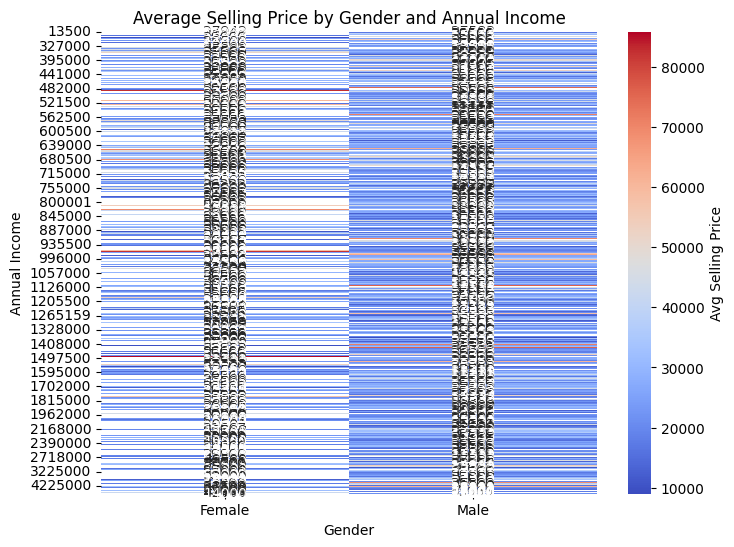

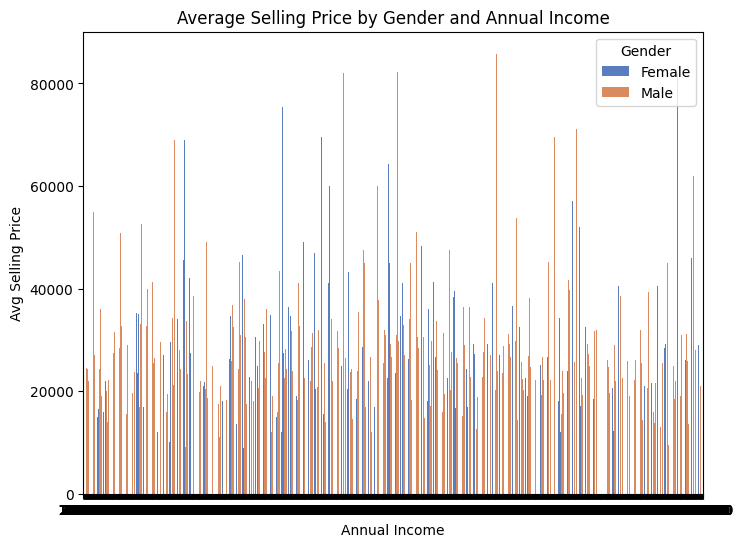

In [31]:
avg_price = df.groupby(["Gender", "Annual Income"])["Price ($)"].mean().reset_index()

avg_price_pivot = avg_price.pivot(index="Annual Income", columns="Gender", values="Price ($)")
print(avg_price)

plt.figure(figsize=(8, 6))
sns.heatmap(avg_price_pivot, annot=True, fmt=".0f", cmap="coolwarm", cbar_kws={'label': 'Avg Selling Price'})
plt.title("Average Selling Price by Gender and Annual Income")
plt.xlabel("Gender")
plt.ylabel("Annual Income")
plt.show()

plt.figure(figsize=(8, 6))
sns.barplot(data=avg_price, x="Annual Income", y="Price ($)", hue="Gender", palette="muted")
plt.title("Average Selling Price by Gender and Annual Income")
plt.xlabel("Annual Income")
plt.ylabel("Avg Selling Price")
plt.legend(title="Gender")
plt.show()


7. What is the distribution of car prices by region, and how does the number of cars sold vary by region ??

In [32]:
df.columns

Index(['Car_id', 'Date', 'Customer Name', 'Gender', 'Annual Income',
       'Dealer_Name', 'Company', 'Model', 'Engine', 'Transmission', 'Color',
       'Price ($)', 'Dealer_No ', 'Body Style', 'Phone', 'Dealer_Region'],
      dtype='object')

Descriptive statistics for car prices by region:
                count          mean           std     min      25%      50%  \
Dealer_Region                                                                 
Aurora         1737.0  28164.561313  15043.979346  9000.0  18001.0  22501.0   
Austin         2238.0  28323.760054  14811.003879  9000.0  18275.0  23000.0   
Greenville     1713.0  28048.761821  15016.679732  9000.0  18000.0  22500.0   
Janesville     2105.0  27855.076010  14345.460842  9000.0  18001.0  23000.0   
Middletown     1732.0  28136.979792  15082.490692  9000.0  18000.0  22700.0   
Pasco          1696.0  28255.606722  14721.892914  9000.0  18500.0  24000.0   
Scottsdale     1867.0  27753.626138  14697.429503  9000.0  18000.0  23000.0   

                    75%      max  
Dealer_Region                     
Aurora         34500.00  85800.0  
Austin         35000.75  85001.0  
Greenville     34000.00  85200.0  
Janesville     34000.00  85301.0  
Middletown     34000.00  8530

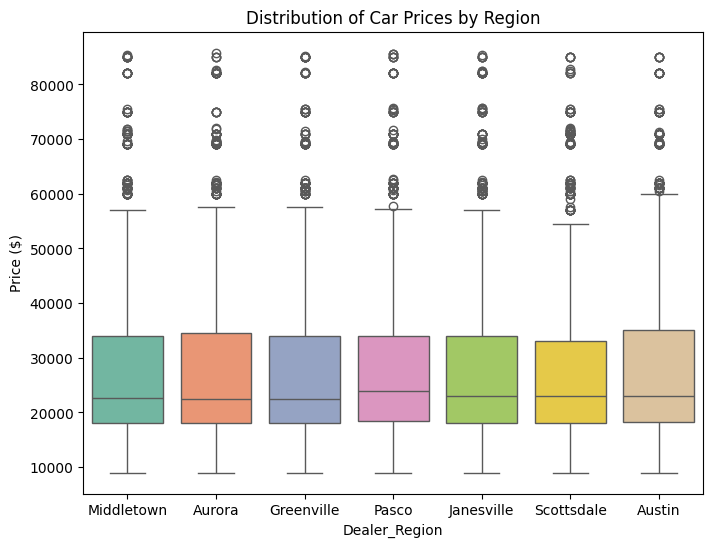

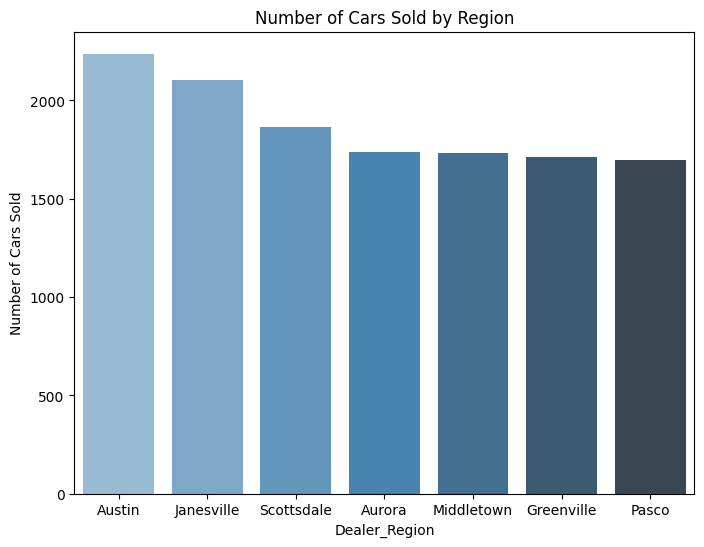

In [34]:
price_stats = df.groupby("Dealer_Region")["Price ($)"].describe()
print("Descriptive statistics for car prices by region:")
print(price_stats)

cars_sold = df["Dealer_Region"].value_counts().reset_index()
cars_sold.columns = ["Dealer_Region", "Cars Sold"]
print("\nNumber of cars sold by region:")
print(cars_sold)

plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x="Dealer_Region", y="Price ($)", palette="Set2")
plt.title("Distribution of Car Prices by Region")
plt.xlabel("Dealer_Region")
plt.ylabel("Price ($)")
plt.show()

plt.figure(figsize=(8, 6))
sns.barplot(data=cars_sold, x="Dealer_Region", y="Cars Sold", palette="Blues_d") # Changed 'Region' to 'Dealer_Region'
plt.title("Number of Cars Sold by Region")
plt.xlabel("Dealer_Region")
plt.ylabel("Number of Cars Sold")
plt.show()

8. How does the average car price differ between cars with different engine sizes ???

In [35]:
df.columns

Index(['Car_id', 'Date', 'Customer Name', 'Gender', 'Annual Income',
       'Dealer_Name', 'Company', 'Model', 'Engine', 'Transmission', 'Color',
       'Price ($)', 'Dealer_No ', 'Body Style', 'Phone', 'Dealer_Region'],
      dtype='object')

                      Engine     Price ($)
0  DoubleÂ Overhead Camshaft  28265.712139
1          Overhead Camshaft  27863.964332


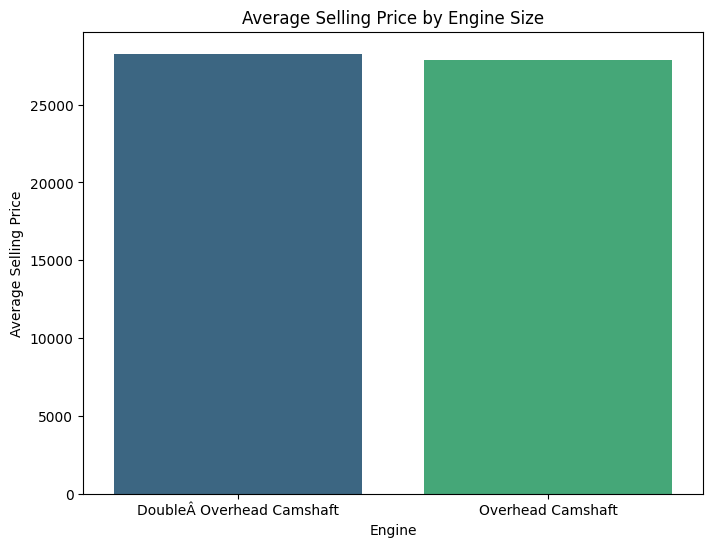

In [36]:
avg_price_by_engine = df.groupby("Engine")["Price ($)"].mean().reset_index()
print(avg_price_by_engine)

plt.figure(figsize=(8, 6))
sns.barplot(data=avg_price_by_engine, x="Engine", y="Price ($)", palette="viridis")
plt.title("Average Selling Price by Engine Size")
plt.xlabel("Engine")
plt.ylabel("Average Selling Price")
plt.show()


9. How do car prices vary based on the customer’s annual income bracket ???

In [37]:
df.columns

Index(['Car_id', 'Date', 'Customer Name', 'Gender', 'Annual Income',
       'Dealer_Name', 'Company', 'Model', 'Engine', 'Transmission', 'Color',
       'Price ($)', 'Dealer_No ', 'Body Style', 'Phone', 'Dealer_Region'],
      dtype='object')

  Income Bracket  Price ($)
0     Low Income        NaN
1  Medium Income        NaN
2    High Income        NaN


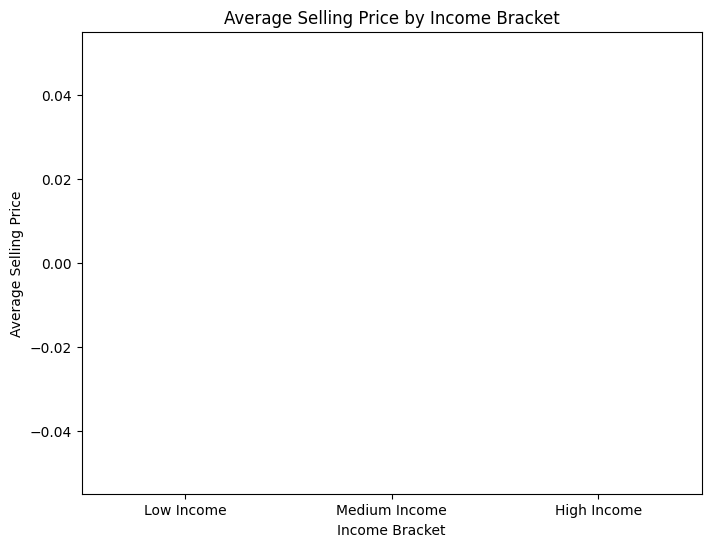

In [38]:
bins = [0, 50, 100, 200]
labels = ['Low Income', 'Medium Income', 'High Income']
df['Income Bracket'] = pd.cut(df["Annual Income"], bins=bins, labels=labels, right=False)

avg_price_by_income = df.groupby("Income Bracket")["Price ($)"].mean().reset_index()
print(avg_price_by_income)

plt.figure(figsize=(8, 6))
sns.barplot(data=avg_price_by_income, x="Income Bracket", y="Price ($)", palette="coolwarm")
plt.title("Average Selling Price by Income Bracket")
plt.xlabel("Income Bracket")
plt.ylabel("Average Selling Price")
plt.show()


10. What are the top 5 car models with the highest number of sales, and how does their price distribution look ??

In [40]:
df.columns

Index(['Car_id', 'Date', 'Customer Name', 'Gender', 'Annual Income',
       'Dealer_Name', 'Company', 'Model', 'Engine', 'Transmission', 'Color',
       'Price ($)', 'Dealer_No ', 'Body Style', 'Phone', 'Dealer_Region',
       'Income Bracket'],
      dtype='object')

Top 5 Car Models by Sales Count:
          Model  sales_count_new
9623   Diamante              230
10358  Diamante              230
12152  Diamante              230
2819   Diamante              230
158    Diamante              230


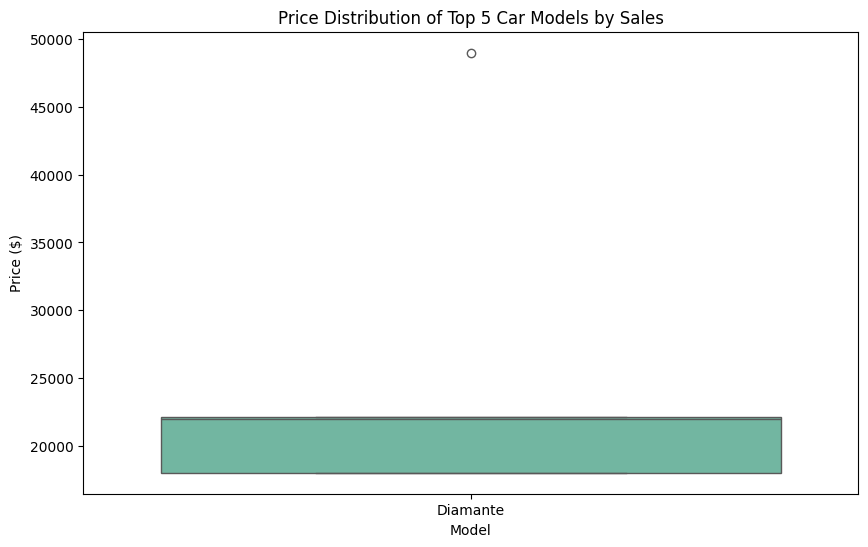

In [58]:
sales_count = df.Model.value_counts()
# Rename the sales_count Series to avoid conflict
df = df.merge(sales_count.rename('sales_count_new'), left_on='Model', right_index=True)

# Now use the new column name for sorting and filtering
top_5_sales = df.sort_values(by="sales_count_new", ascending=False).head(5)
print("Top 5 Car Models by Sales Count:")
print(top_5_sales[['Model', 'sales_count_new']])

plt.figure(figsize=(10, 6))
sns.boxplot(data=top_5_sales, x="Model", y="Price ($)", palette="Set2")
plt.title("Price Distribution of Top 5 Car Models by Sales")
plt.xlabel("Model")
plt.ylabel("Price ($)")
plt.show()

11. How does car price vary with engine size across different car colors, and which colors have the highest price
variation ???

In [59]:
df.columns

Index(['Car_id', 'Date', 'Customer Name', 'Gender', 'Annual Income',
       'Dealer_Name', 'Company', 'Model', 'Engine', 'Transmission', 'Color',
       'Price ($)', 'Dealer_No ', 'Body Style', 'Phone', 'Dealer_Region',
       'Income Bracket', 'sales_count_x', 'sales_count_y', 'sales_count',
       'sales_count_new_x', 'sales_count_new_y', 'sales_count_new'],
      dtype='object')

                                       count          mean           std  \
Color      Engine                                                          
Black      DoubleÂ Overhead Camshaft  2308.0  25837.022097  12536.060854   
           Overhead Camshaft          2003.0  31586.521717  17474.037166   
Pale White DoubleÂ Overhead Camshaft  3008.0  30493.496011  14336.133852   
           Overhead Camshaft          2724.0  23866.366373  12390.520375   
Red        DoubleÂ Overhead Camshaft  1604.0  27582.571696  13689.189835   
           Overhead Camshaft          1441.0  30246.458709  17634.443782   

                                          min      25%      50%      75%  \
Color      Engine                                                          
Black      DoubleÂ Overhead Camshaft   9000.0  18000.0  23000.0  29350.0   
           Overhead Camshaft          10000.0  18000.0  25500.0  43000.0   
Pale White DoubleÂ Overhead Camshaft  10000.0  19500.0  26000.0  42000.0   
           

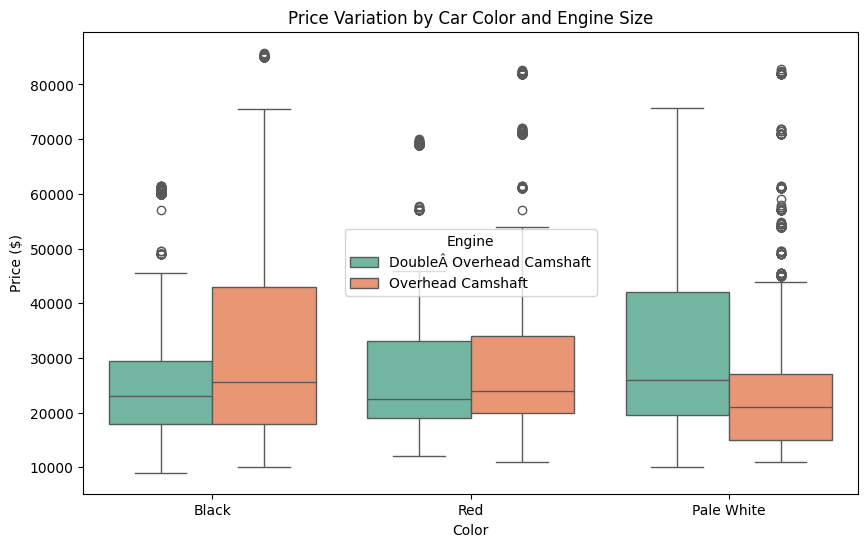


Car Colors with the Highest Price Variation:
        Color  Price Variation
2         Red     15734.127017
0       Black     15302.781486
1  Pale White     13846.899782


In [60]:
price_stats = df.groupby(["Color", "Engine"])["Price ($)"].describe()
print(price_stats)

plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x="Color", y="Price ($)", hue="Engine", palette="Set2")
plt.title("Price Variation by Car Color and Engine Size")
plt.xlabel("Color")
plt.ylabel("Price ($)")
plt.show()

price_variation = df.groupby("Color")["Price ($)"].std().reset_index()
price_variation.columns = ["Color", "Price Variation"]
price_variation = price_variation.sort_values(by="Price Variation", ascending=False)

print("\nCar Colors with the Highest Price Variation:")
print(price_variation)


12. Is there any seasonal trend in car sales based on the date of sale ??

In [61]:
df.columns

Index(['Car_id', 'Date', 'Customer Name', 'Gender', 'Annual Income',
       'Dealer_Name', 'Company', 'Model', 'Engine', 'Transmission', 'Color',
       'Price ($)', 'Dealer_No ', 'Body Style', 'Phone', 'Dealer_Region',
       'Income Bracket', 'sales_count_x', 'sales_count_y', 'sales_count',
       'sales_count_new_x', 'sales_count_new_y', 'sales_count_new'],
      dtype='object')

    Month  Sales Count
0       1          790
1       2          735
2       3         1535
3       4         1523
4       5          750
5       6          690
6       7          700
7       8          810
8       9         1475
9      10          835
10     11         1620
11     12         1625


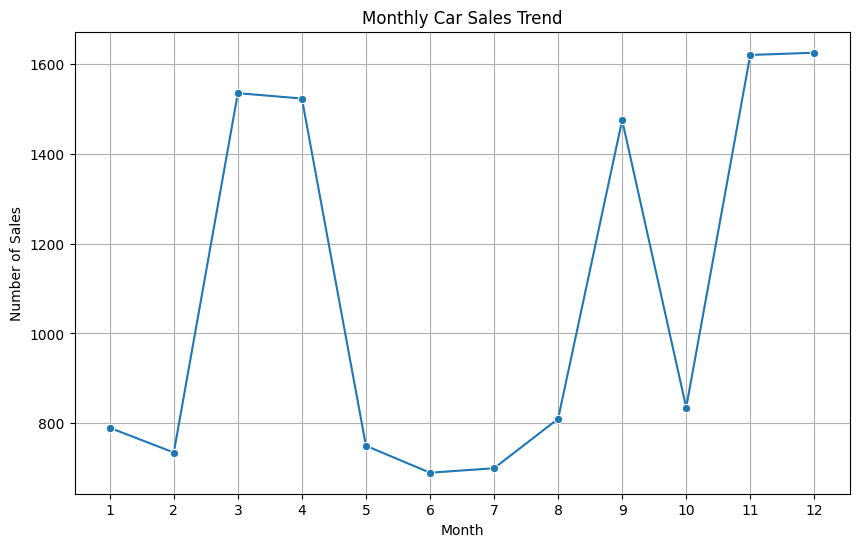

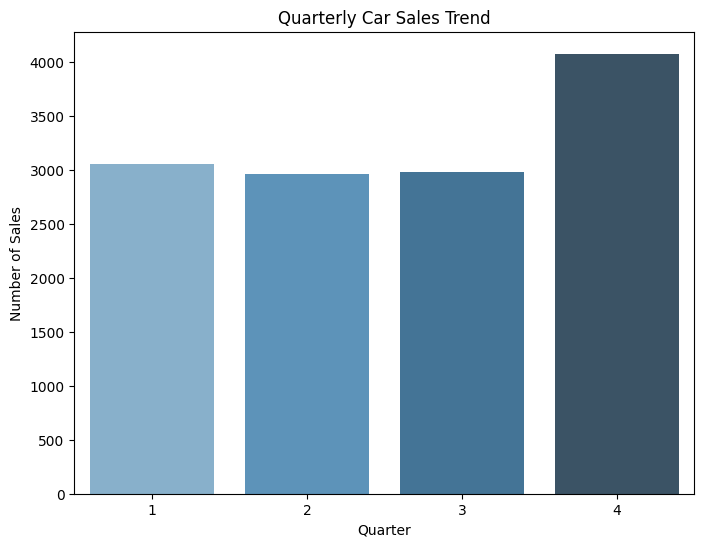

In [62]:
df["Date"] = pd.to_datetime(df["Date"])
df["Month"] = df["Date"].dt.month
df["Year"] = df["Date"].dt.year

monthly_sales = df.groupby("Month").size().reset_index(name="Sales Count")
print(monthly_sales)

plt.figure(figsize=(10, 6))
sns.lineplot(data=monthly_sales, x="Month", y="Sales Count", marker='o')
plt.title("Monthly Car Sales Trend")
plt.xlabel("Month")
plt.ylabel("Number of Sales")
plt.xticks(range(1, 13))
plt.grid(True)
plt.show()

df["Quarter"] = df["Date"].dt.quarter
quarterly_sales = df.groupby("Quarter").size().reset_index(name="Sales Count")

plt.figure(figsize=(8, 6))
sns.barplot(data=quarterly_sales, x="Quarter", y="Sales Count", palette="Blues_d")
plt.title("Quarterly Car Sales Trend")
plt.xlabel("Quarter")
plt.ylabel("Number of Sales")
plt.show()


13. How does the car price distribution change when considering different combinations of body style and
transmission type ??

In [63]:
df.columns

Index(['Car_id', 'Date', 'Customer Name', 'Gender', 'Annual Income',
       'Dealer_Name', 'Company', 'Model', 'Engine', 'Transmission', 'Color',
       'Price ($)', 'Dealer_No ', 'Body Style', 'Phone', 'Dealer_Region',
       'Income Bracket', 'sales_count_x', 'sales_count_y', 'sales_count',
       'sales_count_new_x', 'sales_count_new_y', 'sales_count_new', 'Month',
       'Year', 'Quarter'],
      dtype='object')

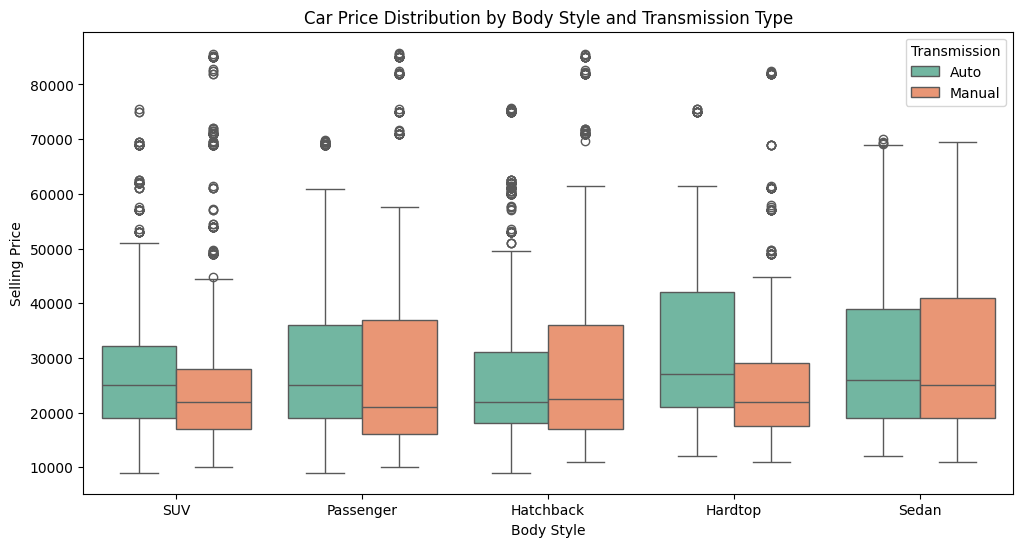

In [65]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x="Body Style", y="Price ($)", hue="Transmission", palette="Set2") # Changed y to 'Price ($)' and hue to 'Transmission'
plt.title("Car Price Distribution by Body Style and Transmission Type")
plt.xlabel("Body Style")
plt.ylabel("Selling Price")
plt.show()


14. What is the correlation between car price, engine size, and annual income of customers, and how do these
features interact ??

In [66]:
df.columns

Index(['Car_id', 'Date', 'Customer Name', 'Gender', 'Annual Income',
       'Dealer_Name', 'Company', 'Model', 'Engine', 'Transmission', 'Color',
       'Price ($)', 'Dealer_No ', 'Body Style', 'Phone', 'Dealer_Region',
       'Income Bracket', 'sales_count_x', 'sales_count_y', 'sales_count',
       'sales_count_new_x', 'sales_count_new_y', 'sales_count_new', 'Month',
       'Year', 'Quarter'],
      dtype='object')

                     Price ($)  Engine Type Numeric  Annual Income
Price ($)             1.000000                  NaN       0.014394
Engine Type Numeric        NaN                  NaN            NaN
Annual Income         0.014394                  NaN       1.000000


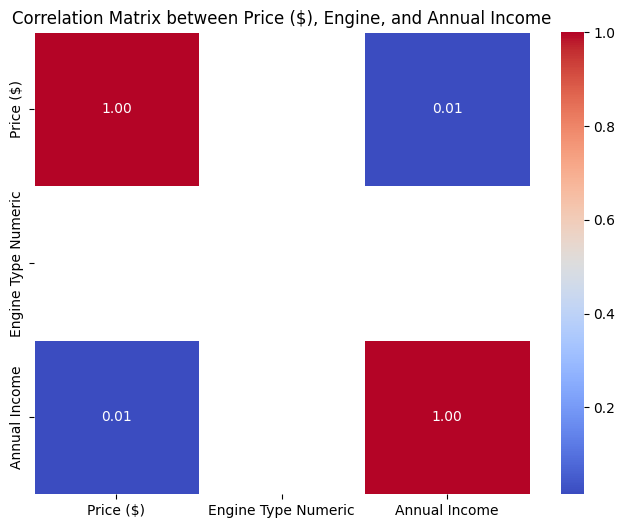

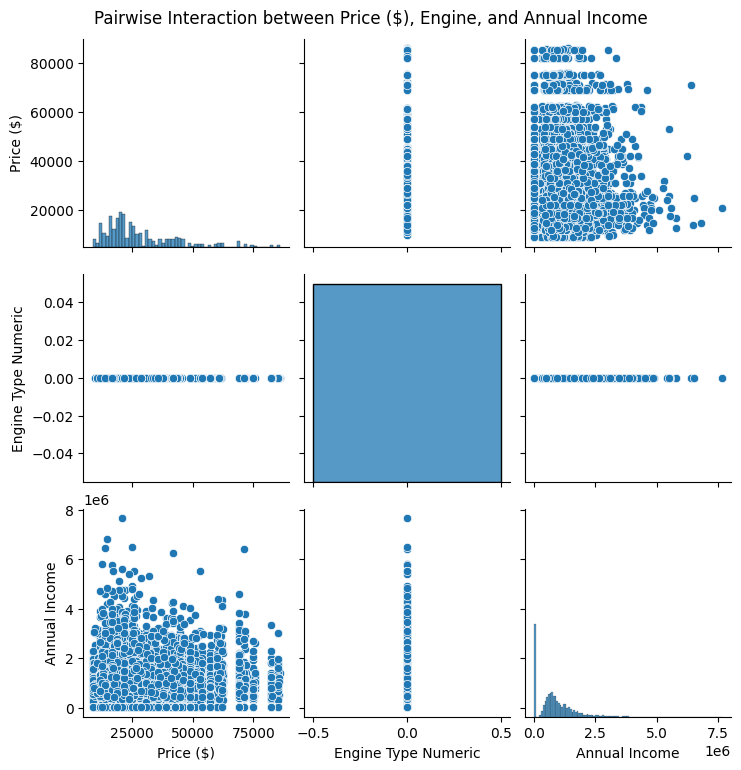

In [74]:
df['Engine Type Numeric'] = df['Engine'].map({
    "Overhead Camshaft": 0,
    "Double Overhead Camshaft": 1
})
correlation_matrix = df[["Price ($)", "Engine Type Numeric", "Annual Income"]].corr()
print(correlation_matrix)

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix between Price ($), Engine, and Annual Income")
plt.show()

sns.pairplot(df[["Price ($)", "Engine Type Numeric", "Annual Income"]])
plt.suptitle("Pairwise Interaction between Price ($), Engine, and Annual Income", y=1.02)
plt.show()


15. How does the average car price vary across different car models and engine types ??

In [75]:
df.columns

Index(['Car_id', 'Date', 'Customer Name', 'Gender', 'Annual Income',
       'Dealer_Name', 'Company', 'Model', 'Engine', 'Transmission', 'Color',
       'Price ($)', 'Dealer_No ', 'Body Style', 'Phone', 'Dealer_Region',
       'Income Bracket', 'sales_count_x', 'sales_count_y', 'sales_count',
       'sales_count_new_x', 'sales_count_new_y', 'sales_count_new', 'Month',
       'Year', 'Quarter', 'Engine Type Numeric'],
      dtype='object')

        Model                     Engine     Price ($)
0       3-Sep  DoubleÂ Overhead Camshaft  35991.135417
1      3000GT  DoubleÂ Overhead Camshaft  22563.741176
2      3000GT          Overhead Camshaft  21791.546667
3        300M  DoubleÂ Overhead Camshaft  21439.616541
4        323i  DoubleÂ Overhead Camshaft  16780.746032
..        ...                        ...           ...
256  Windstar          Overhead Camshaft  17131.000000
257  Wrangler  DoubleÂ Overhead Camshaft  21841.654545
258  Wrangler          Overhead Camshaft  18584.368421
259    Xterra  DoubleÂ Overhead Camshaft  15474.133333
260    Xterra          Overhead Camshaft  31066.916667

[261 rows x 3 columns]


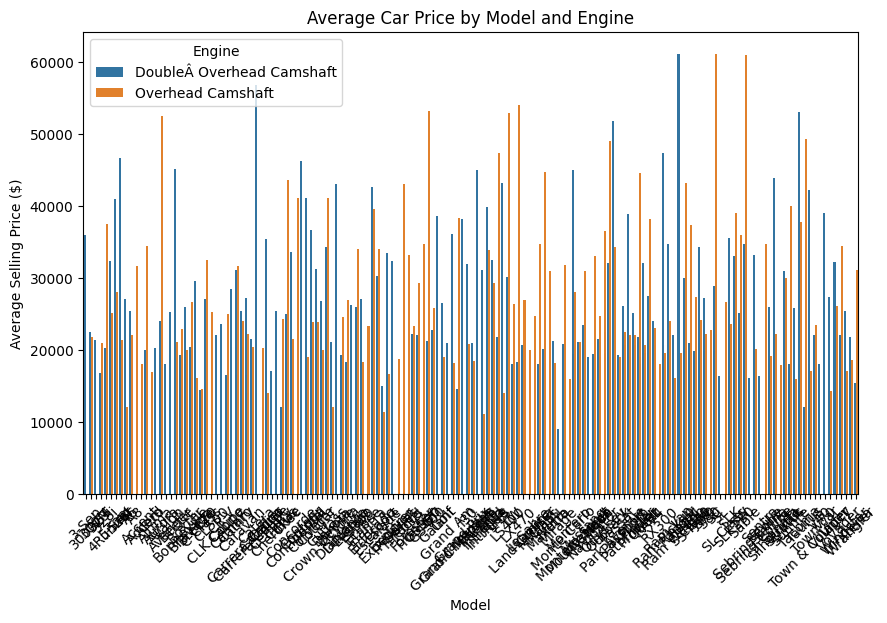

In [76]:
avg_price_by_model_and_engine = df.groupby(["Model", "Engine"])["Price ($)"].mean().reset_index()
print(avg_price_by_model_and_engine)

plt.figure(figsize=(10, 6))
sns.barplot(x="Model", y="Price ($)", hue="Engine", data=avg_price_by_model_and_engine)
plt.title("Average Car Price by Model and Engine")
plt.ylabel("Average Selling Price ($)")
plt.xlabel("Model")
plt.xticks(rotation=45)
plt.show()
